 <font size=5><font color='darkslateblue'>
<b>Стратегия взаимодействия с клиентами на основе аналитических данных</b></font>

## Описание проекта

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. <b>Задача — провести анализ и подготовить план действий по удержанию клиентов.</b>
А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;<br/>
    2) предложить меры по снижению оттока;<br/>
    3) определить другие особенности взаимодействия с клиентами.

## Описание исходных данных

Фитнесс-центр предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

<b>Данные клиента за предыдущий до проверки факта оттока месяц:</b><br/>
`gender` — пол;
<br/>
`Near_Location` — проживание или работа в районе, где находится фитнес-центр;<br/>
`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
<br/>
`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
<br/>
`Phone` — наличие контактного телефона;
<br/>
`Age` — возраст;
<br/>
`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

<b>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:</b>
<br/>
`Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
<br/>
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
<br/>
`Group_visits` — факт посещения групповых занятий;
<br/>
`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
<br/>
`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
<br/>
`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
<br/>
`Churn` — факт оттока в текущем месяце.

## Ознакомление и подготовка данных

In [1]:
#импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from scipy.cluster import hierarchy


import math as mth
import seaborn as sns

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
# ML

sns.set(font_scale=1.1)
#sns.set_style("darkgrid", {"grid.color": "dimgray", "grid.linestyle": ":"})
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.3f}'.format)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [2]:
# загружаем исходные данные
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

# функция для первого взгляда
def first_look(df):
    print('\033[1m' + 'Общая информация о датасете:' + '\033[0m')
    df.info(),
    (df.style.set_properties(
    **{'text-align': 'center'}).highlight_null(null_color='lightcoral')),
    print('-'*10*3),
    print('\033[1m' + 'Количество пропусков в столбцах:' + '\033[0m'),
    print(df.isna().sum()),
    print('-'*10*3),
    print('Количество дублей:', df.duplicated().sum())
    return df.sample(10, random_state=1)

first_look(gym_churn)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total  

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
200        0              1        1              0      1                1   
1078       1              1        0              0      1                1   
610        1              1        1              1      1                6   
2159       1              0        1              0      1                1   
1169       0              0        0              0      1                1   
2448       0              0        0              0      1               12   
2938       1              1        0              0      0                1   
813        1              1        1              1      1                6   
1268       0              1        0              1      1                1   
870        0              1        0              0      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
200              0   34                        46.492                  1.000   
1078             0   27                        24.554                  1.000   
610              1   31                        85.672                  6.000   
2159             0   26                        75.803                  1.000   
1169             0   31                       410.757                  1.000   
2448             1   28                       106.110                 10.000   
2938             0   23                       199.155                  1.000   
813              1   34                       115.869                  4.000   
1268             0   29                       158.982                  1.000   
870              1   32                        67.588                  1.000   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
200          0                      1.011                              0.000   
1078         4                      1.391                              0.979   
610          1                      1.010                              0.731   
2159         1                      1.457                              1.540   
1169         3                      2.402                              2.473   
2448         3                      2.559                              2.521   
2938         0                      2.947                              2.702   
813          9                      0.652                              0.571   
1268         2                      1.776                              0.705   
870          4                      1.217                              1.334   

      Churn  
200       1  
1078      1  
610       1  
2159      1  
1169      0  
2448      0  
2938      1  
813       0  
1268      1  
870       0

<font size=2,5> На первый взгляд данные в датасете в порядке, пропусков нет, поправим сразу регистр названий столбцов в настоящий <i>snake_case</i>. С типами данных тоже всё в порядке, за исключением столбца `Month_to_end_contract` - срок до окончания абонемента указывается в месяцах, плавающая точка ни к чему. Также немного поменяем последовательность столбцов - сгруппируем вместе бинарные признаки, "средние" и данные по "месяцам".

In [3]:
# нижний регистр для столбцов
gym_churn.columns = map(str.lower, gym_churn.columns)

In [4]:
# правим тип столбца 
gym_churn['month_to_end_contract'] = gym_churn['month_to_end_contract'].astype('int')
gym_churn.head(5)

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                        14.227                      5   
1             1   31                       113.203                     12   
2             0   28                       129.448                      1   
3             1   33                        62.670                     12   
4             0   26                       198.362                      1   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                      0.020                              0.000   
1         7                      1.923                              1.910   
2         2                      1.859                              1.737   
3         2                      3.206                              3.357   
4         3                      1.114                              1.120   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

<font size=2,5> Перегруппируем столбцы:

In [5]:
gym_churn.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [6]:
gym_churn = gym_churn[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn',
                       'age',
                       'contract_period', 'month_to_end_contract', 'lifetime',
                       'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
gym_churn.head(5)

gender  near_location  partner  promo_friends  phone  group_visits  churn  \
0       1              1        1              1      0             1      0   
1       0              1        0              0      1             1      0   
2       0              1        1              0      1             0      0   
3       0              1        1              1      1             1      0   
4       1              1        1              1      1             0      0   

   age  contract_period  month_to_end_contract  lifetime  \
0   29                6                      5         3   
1   31               12                     12         7   
2   28                1                      1         2   
3   33               12                     12         2   
4   26                1                      1         3   

   avg_additional_charges_total  avg_class_frequency_total  \
0                        14.227                      0.020   
1                       113.203                      1.923   
2                       129.448                      1.859   
3                        62.670                      3.206   
4                       198.362                      1.114   

   avg_class_frequency_current_month  
0                              0.000  
1                              1.910  
2                              1.737  
3                              3.357  
4                              1.120

<font size=2,5> После группировки таблица стала немного удобнее для визуальной работы, для надёжности проверим ещё датасет на дубликаты:

In [7]:
gym_churn.duplicated().sum()

0

## Исследовательский анализ данных (EDA)

### Значения в столбцах

In [8]:
gym_churn.describe().T

count    mean    std    min    25%  \
gender                            4,000.000   0.510  0.500  0.000  0.000   
near_location                     4,000.000   0.845  0.362  0.000  1.000   
partner                           4,000.000   0.487  0.500  0.000  0.000   
promo_friends                     4,000.000   0.308  0.462  0.000  0.000   
phone                             4,000.000   0.903  0.295  0.000  1.000   
group_visits                      4,000.000   0.412  0.492  0.000  0.000   
churn                             4,000.000   0.265  0.442  0.000  0.000   
age                               4,000.000  29.184  3.258 18.000 27.000   
contract_period                   4,000.000   4.681  4.550  1.000  1.000   
month_to_end_contract             4,000.000   4.323  4.191  1.000  1.000   
lifetime                          4,000.000   3.725  3.749  0.000  1.000   
avg_additional_charges_total      4,000.000 146.944 96.356  0.148 68.869   
avg_class_frequency_total         4,000.000   1.879  0.972  0.000  1.181   
avg_class_frequency_current_month 4,000.000   1.767  1.053  0.000  0.963   

                                      50%     75%     max  
gender                              1.000   1.000   1.000  
near_location                       1.000   1.000   1.000  
partner                             0.000   1.000   1.000  
promo_friends                       0.000   1.000   1.000  
phone                               1.000   1.000   1.000  
group_visits                        0.000   1.000   1.000  
churn                               0.000   1.000   1.000  
age                                29.000  31.000  41.000  
contract_period                     1.000   6.000  12.000  
month_to_end_contract               1.000   6.000  12.000  
lifetime                            3.000   5.000  31.000  
avg_additional_charges_total      136.220 210.950 552.591  
avg_class_frequency_total           1.833   2.536   6.024  
avg_class_frequency_current_month   1.720   2.510   6.147

In [9]:
gym_churn['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

<font size=2,5> С бинарными признаками всё в порядке, никаких нулевых значений и значений >1. По данным признакам сразу можно сделать следующие выводы о клиентах:
* по полу (`gender`) клиенты фитнесс-центров распределены практически поровну, среднее значение 0,51;
* большая часть клиентов живёт или работает в районе посещаемого фитнесс центра (`near_location`), среднее значение 0,85; <i><font color='mediumblue'>(здесь и далее выводы по бинарным признакам даются с условием, что 1 - это да, а 0 - нет., в целом это логично, но т.к. в исходных данных данный момент дополнительно не уточнён, руководствуемся только логикой)</font></i>
* простых клиентов также практически поровну с партнёрскими клиентами (`partner`), среднее значение 0,49;
* клиентов по акции приведи друга (`promo_friends`) треть, среднее значение 0,31;
* малый процент клиентов, десятая часть, не делится своим телефоном (`phone`), среднее значение 0,90;
* факт посещения групповых занятий (`group_visits`) отмечен тоже почти у половины клиентов, среднее значение 0,41;
* факт оттока в текущем месяце (`churn`) зафиксирован почти у трети клиентов, среднее значение 0,27.<br/>
    
    
* данные о возрасте клиентов (`age`) корректны, интервал от 18 лет до 41 года;
* абонементы (`contract_period`) примерно половина клиентов приобретает на 1 месяц, и по четверти клиентов приобретают годовые и полугодовые абонементы;
* самый большой `lifetime` клиентов - 31 месяц, медиана же составляет 3 месяца, а среднее значение 3,7 месяца;     
* среднее значение суммарной выручки от доп.услуг (`avg_additional_charges_total`) 146,94 у.е., а медианное 136,22, значения довольно близки, скорее всего нет каких-то слишком больших "выбросов";
* значения по частоте посещений в неделю за всё время (`avg_class_frequency_total`) и за предыдущий месяц (`avg_class_frequency_current_month`) схожи, минимумы одинаковы - 0 тренировок, максимальные значения 6,02 и 6,15 тренировок в неделю соответственно, медиана 1,83 и 1,72, а среднее 1,88 и 1,77.<br/>

### Cредние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [10]:
gym_churn.groupby('churn').mean()

gender  near_location  partner  promo_friends  phone  group_visits  \
churn                                                                       
0       0.510          0.873    0.534          0.354  0.904         0.464   
1       0.511          0.768    0.355          0.184  0.903         0.269   

         age  contract_period  month_to_end_contract  lifetime  \
churn                                                            
0     29.977            5.747                  5.283     4.712   
1     26.990            1.729                  1.663     0.991   

       avg_additional_charges_total  avg_class_frequency_total  \
churn                                                            
0                           158.446                      2.025   
1                           115.083                      1.475   

       avg_class_frequency_current_month  
churn                                     
0                                  2.028  
1                                  1.045

<font size=2,5> При разделении клиентов на ушедших и оставшихся по признакам наблюдаем следующее:<br/>
    
<u>по бинарным признакам:</u>
* по гендеру паритет, значения практически одинаковы;
* работают или живут в районе фитнесс-центра 87% оставшихся клиентов, 77% ушедших;
* из клиентов по партнёрской программе уходит 35,5%, оставшихся половина - 53%;
* по акции "приведи друга" среди оставшихся 35%, среди ушедших 18%;
* телефоны оставляют одинаково клиенты из двух групп;
* групповые занятия посещают 27% ушедших клиентов и 46% оставшихся;<br/>
    
<u>по остальным признакам:</u>
* средний возраст оставшихся клиентов немного выше 30 лет против 27 у ушедших;
* у ушедших клиентов контракт в большинстве своём скорее всего оформлен на один месяц - среднее значение 1,73, тогда как у оставшихся скорее полугодовой, среднее значение 5,75. Средние сроки до окончания контракта в этих группах 5,3 и 1,7 месяца соответственно;
* выручка с оставшихся клиентов выше - 158,5 у.е., у ушедших выручка 115,1 у.е.;
* частота недельных помещений и с начала действия абонемента, и недельная за прошлый месяц выше у оставшихся клиентов и составляет 2 тренировки, для ушедших же это 1,5 с начала действия абонемента и 1 за последний месяц.<br/>
    
<b>Уже можно попробовать составить характер поведения клиентов</b>:
* остающийся клиент это в первую очередь клиент с длинным (полугодовым, годовым) абонементом, изначально более замотивированный на занятия спортом, тогда как уходяший клиент скорее всего приобретал только месячный абонемент, возможно в целях простого ознакомления с залом, когда хочется "пощупать" заведение, а одной ознакомительной тренировки недостаточно.
* мотивированный остающийся клиент больше тратит денег на доп.услуги, охотнее занимается в группе и вообще чаще посещает фитнесс-центр. Если для остающихся клиентов есть пускай и незначительное, но превышение ср.значения тренировок за последний месяц, по сравнению с общим ср.числом (2,025 < 2.028), клиент втягивается, ему нравится посещать занятия и он старается больше времени уделять физической активности. То для ушедших клиентов показатель за последний месяц уже заметно ниже общего ср.числа тренировок (1,475 > 1.045), с течением времени желание тренироваться в зале, который по каким-то причинам тебя не устраивает разумеется будет падать.
* Влияние на поведение клиентов, пускай и не такой заметное, оказывает близость зала к дому/месту работы, но процент остающихся клиентов с залом поблизости всё же больше, чем среди ушедших.
    


### Графики распределения признаков для тех, кто ушёл и тех, кто остался

<font size=2,5> Разделим признаки на бинарные и остальные

In [11]:
# список с бинарными признаками
binary = gym_churn.columns.values[0:6].tolist()
binary

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'group_visits']

In [12]:
# список с числовыми признаками
numerical = gym_churn.columns.values[7:].tolist()
numerical

['age',
 'contract_period',
 'month_to_end_contract',
 'lifetime',
 'avg_additional_charges_total',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

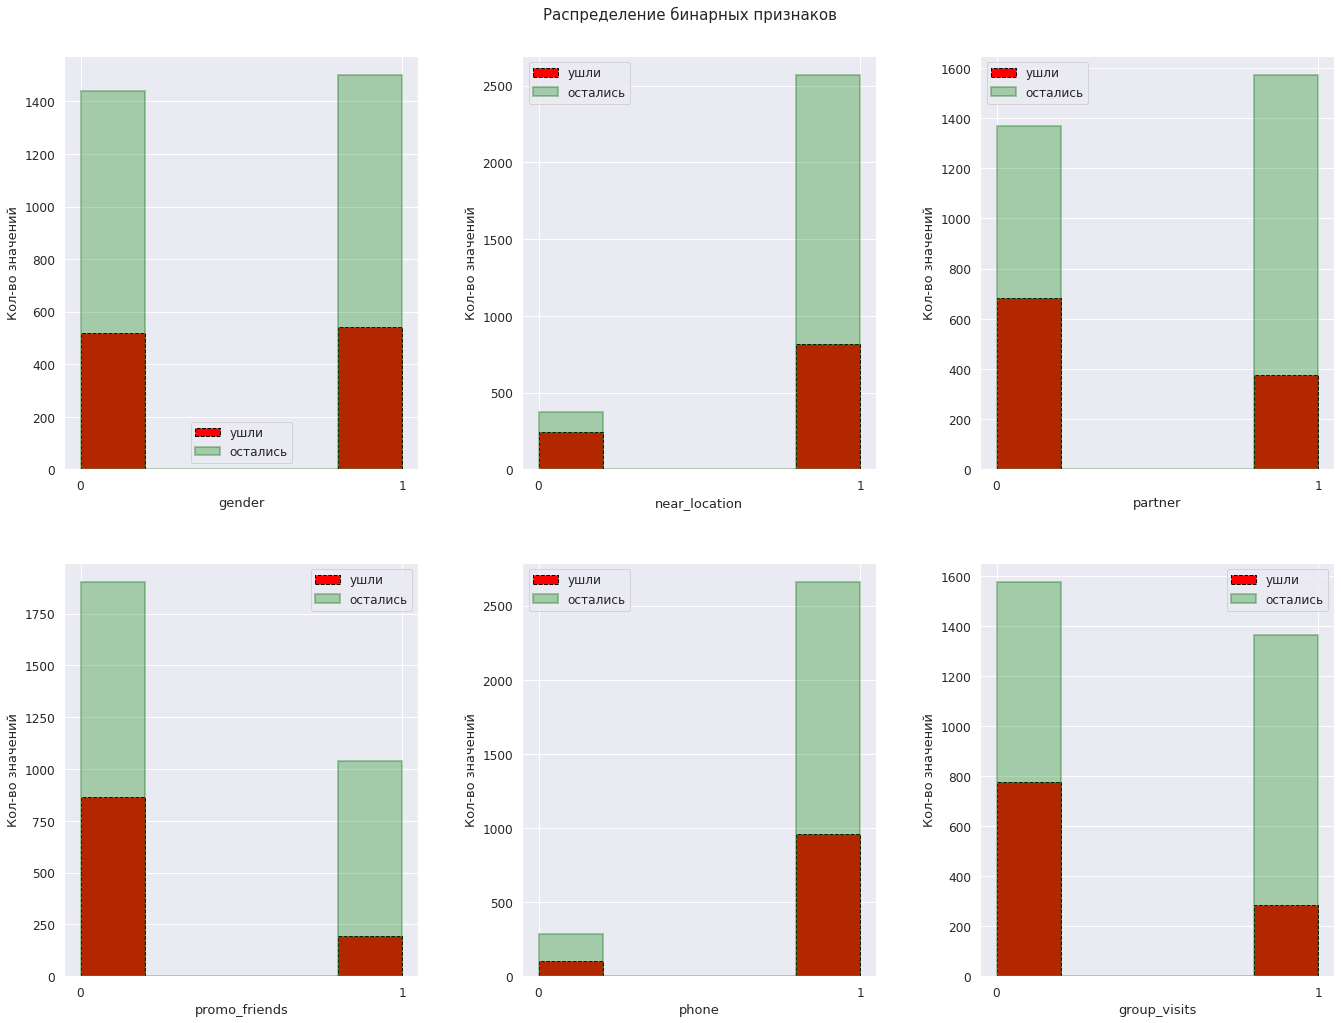

In [13]:
# графики для бинарных признаков

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение бинарных признаков', fontsize=15)
for value in binary:
    ax = axes_list.pop(0)
    # для ушедших
    sns.distplot(gym_churn.query('churn == 1')[value], bins=5, ax=ax, kde=False, label='ушли',
                 hist_kws = {'color':'red', 'edgecolor':'black', 'linewidth':1, 'linestyle':'--', 'alpha':1}),
    # для оставшихся
    sns.distplot(gym_churn.query('churn == 0')[value], bins=5, ax=ax, kde=False, label='остались',
                 hist_kws = {'color':'green', 'edgecolor':'darkgreen', 'linewidth':2, 'linestyle':'-', 'alpha':0.3})
    ax.set_xticks([0,1])
    ax.set_xlabel(value, fontsize=13)
    ax.set_ylabel('Кол-во значений', fontsize=13)
    ax.legend();

<font size=2,5><u>По бинарным признакам можно сделать следующие выводы:</u>
* по гендерам распределение общих долей и процента ушедших клиентов примерно поровну;
* живущих/работающих рядом с фитнесс-центром значительно больше, а доля ушедших сильно меньше, чем у тех, кто вынужден долго добираться до зала;
* доля "партнёрских" пользователей немного больше, чем простых клиентов, а отток их примерно в два раза ниже, чес у простых клиентов;
* участников промо-акции "приведи друга" почти в два раза меньше, чем обычных клиентов, но зато среди них доля ушедших значительно меньше, чем среди простых клиентов;
* среди тех, кто оставил свой контактный номер и нет, доли ушедших пользователей примерно равны, вряд ли этот показатель оказывает сильное влияние;
* а вот факт участия в групповых тренировках влияет на пользователей, при почти равных долях, доля оттока непосещавших групповые занятия примерно в 3 раза больше таковой у тех, кто на групповые занятия ходил.<br/>
    
Построим графики для остальных признаков

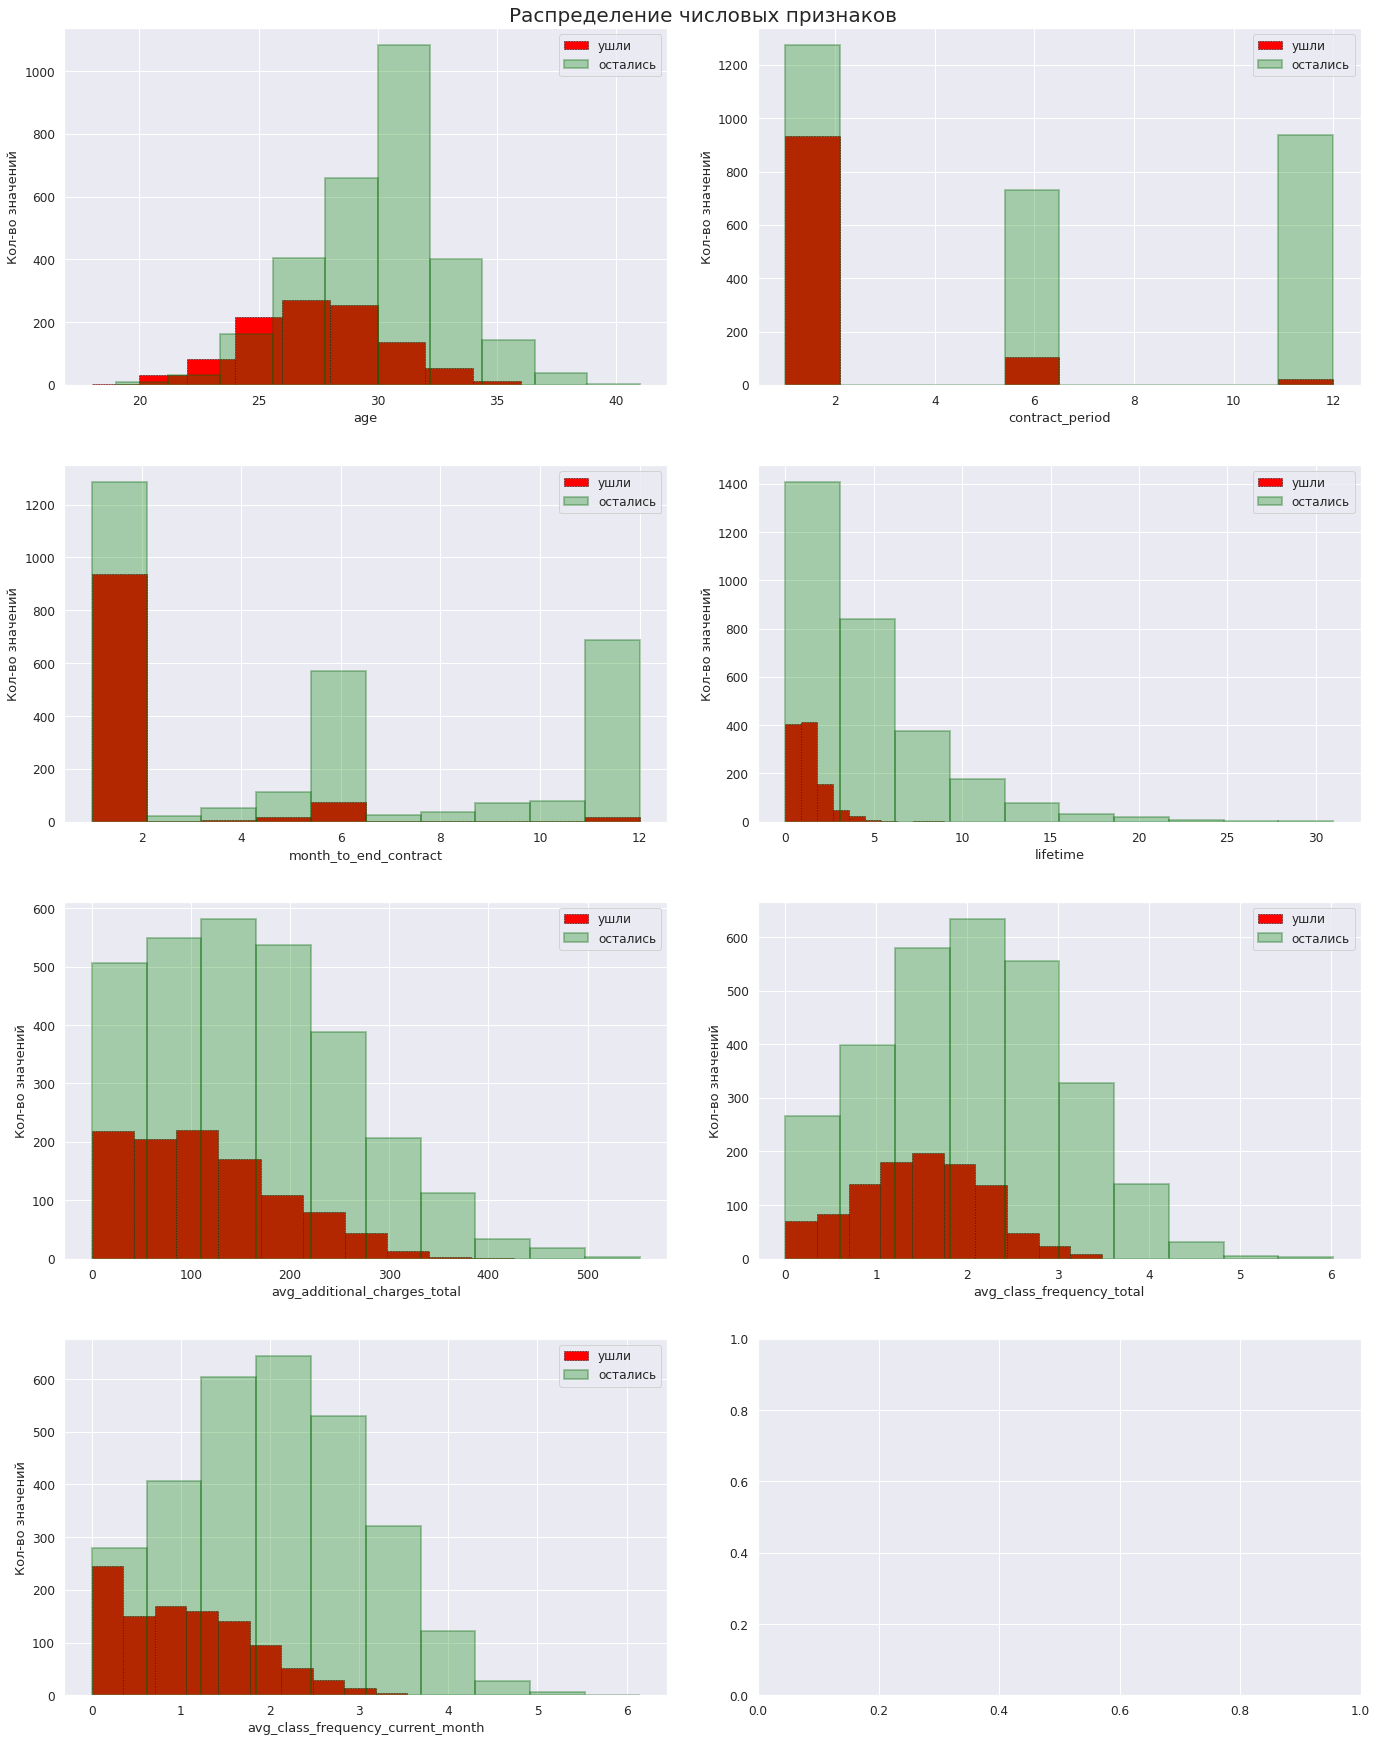

In [14]:
# графики для числовых признаков

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,25))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=4.0)
fig.suptitle('Распределение числовых признаков', fontsize=20)
for value in numerical:
    ax = axes_list.pop(0)
    # для ушедших
    sns.distplot(gym_churn.query('churn == 1')[value], bins=10, ax=ax, kde=False, label='ушли',
                 hist_kws = {'color':'red', 'edgecolor':'black', 'linewidth':.5, 'linestyle':'--', 'alpha':1}),
    # для оставшихся
    sns.distplot(gym_churn.query('churn == 0')[value], bins=10, ax=ax, kde=False, label='остались',
                 hist_kws = {'color':'green', 'edgecolor':'darkgreen', 'linewidth':2, 'linestyle':'-', 'alpha':0.3})
    #ax.set_xticks([0,1])
    ax.set_xlabel(value, fontsize=13)
    ax.set_ylabel('Кол-во значений', fontsize=13)
    ax.legend();

<font size=2,5><u>По числовым признакам выводы  следующие:</u>
* возраст - чем старше клиент, тем меньше вероятность его ухода, клиенты в возрасте до ~27 лет уходят очень часто;
* период контракта - здесь хорошо видно, что клиенты с длительным контрактом на 12 месяцев практически не уходят, а вот текучка клиентов с абонементов сроком на один месяц очень сильная;
* со сроком до окончания контракта ситуация схожая, у кого остаётся один месяц до конца контракта, те чащё всего и уходят;
* отток клиентов идёт в первые пять месяцев, чем лайфтайм клиентов выше, тем меньше вероятность его ухода, однако и клиентов со "сроком жизни" больше года значительно меньше, чем клиентов до года;
* графики выручки от доп.услуг схожи как у оставшихся клиентов, так и тех, кто ушёл в отток. Что там, что там большая часть платит до 250 у.е в месяц. У оставшихся клиентов лишь немного длиннее "хвост" - есть небольшшое кол-вопользователей, готовх тратить в месяц более 350 у.е.
* средняя частота посещений в неделю за все время - у клиентов, тренирующихся до двух раз в неделю доли оттока от общего числа примерно одинаковы, но уже на трёх тренировках в неделю ситуация меняется, отток резко падает, с значения больше 4 тренировок в неделю оттока нет, определённо так много тренировко себе могут позволить либо проффесиональные спортсмены, либо очень увлечённые любители, у которых есть чёткий тренировочный график;
* график средней частоты посещений в неделю за предыдущий месяц похож с таковым для графика за всё время, с тем исключением, что чем клиент чаще ходил в фитнесс-центр, тем меньше отток. Количество тех, кто за последний месяц не посещал тренировки почти такое же, как и кто ушел.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ визуализации, здорово что используешь метод `subplots`.
    


</div>

### Матрица корреляций

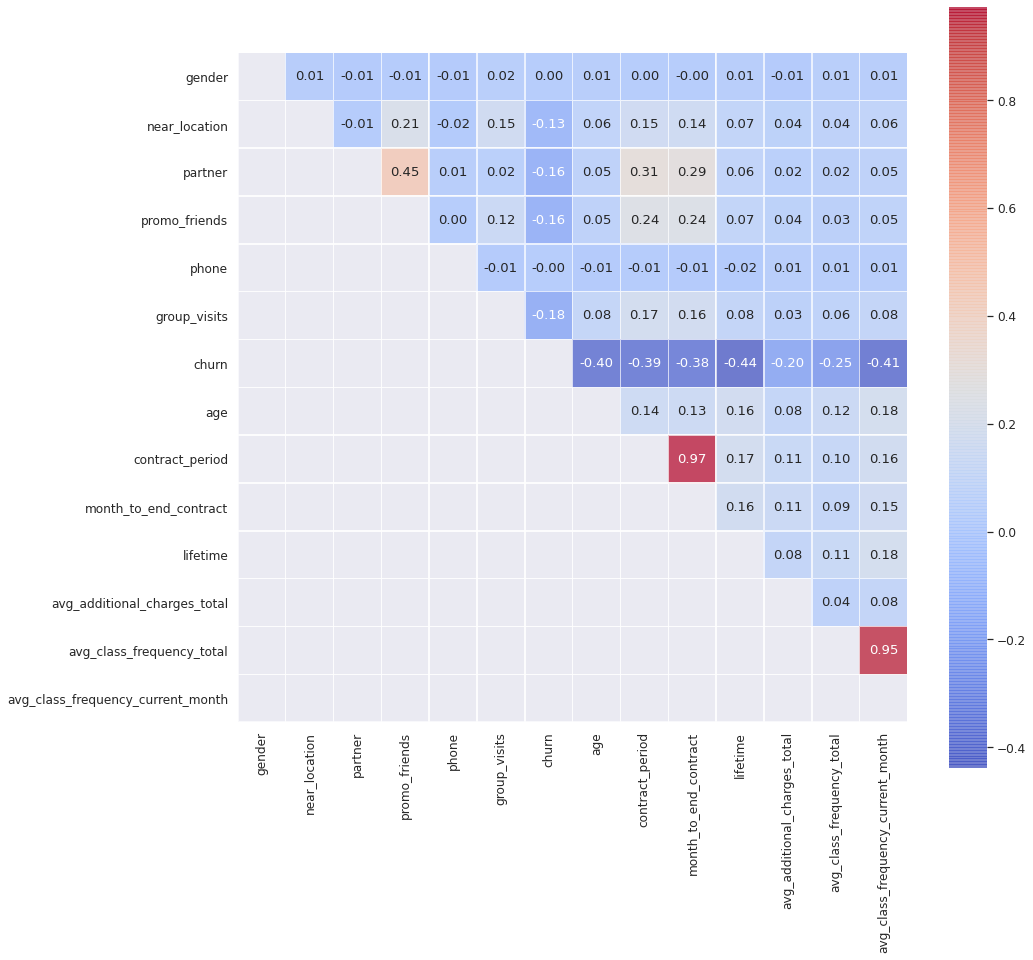

In [15]:
corr_mtrx = gym_churn.corr()
mask = np.tril(np.ones_like(corr_mtrx, dtype=bool))

f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr_mtrx, mask=mask, annot = True, fmt = '0.2f', linewidths=.5, cmap="coolwarm", square=True, alpha=.7);
#plt.xticks(rotation=70);

<font size=2,5><u>По матрице корреляций видим следующее:</u>
* Самая сильная положительная корреляция у срока контракта и срока до окончания контракта, а также у частоты посещений за всё время и за предыдуший месяц, стоит удалить по одному признаку из каждой пары, чтобы исключить мультиколлинеарность; 
* Хорошая корреляция между промо "приведи друга" и партнёрской программой, похоже что коллеги и друзья через "сарафанное радио" делают неплохую рекламу;
* партнёрская программа также неплохо, в сравнении с остальными показателями, коррелирует с периодом контракта;
* Сильную отрицательную зависимость показывает факт оттока с таким покащателями в порядке усиления связи: срок до окончания контракта, срок контракта, возраст, частота посещений за последний месяц и лайфтайм;
* есть пары признаков с нулевой корреляцией: телефон и партнёрская программа, отток и гендер, отток и телефон, период контракта и пол. Что в прочем логично, сложно представить взаимосвязь между оставил ли клиент свой номер телефона и ушёл в этом месяце.

<font size=2,5>Исключим мультиколлинеарность, удалим признаки `contract_period` и `avg_class_frequency_current_month` 

In [16]:
gym_churn_edit = gym_churn.drop(columns=['contract_period', 'avg_class_frequency_current_month'])
gym_churn_edit.head()

gender  near_location  partner  promo_friends  phone  group_visits  churn  \
0       1              1        1              1      0             1      0   
1       0              1        0              0      1             1      0   
2       0              1        1              0      1             0      0   
3       0              1        1              1      1             1      0   
4       1              1        1              1      1             0      0   

   age  month_to_end_contract  lifetime  avg_additional_charges_total  \
0   29                      5         3                        14.227   
1   31                     12         7                       113.203   
2   28                      1         2                       129.448   
3   33                     12         2                        62.670   
4   26                      1         3                       198.362   

   avg_class_frequency_total  
0                      0.020  
1                      1.923  
2                      1.859  
3                      3.206  
4                      1.114

## Модель прогнозирования оттока клиентов

<font size=2,5><b>Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:</b>

### Разделение данных на обучающую и валидационную выборку функцией train_test_split().

In [17]:
# делим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn_edit.drop(columns=['churn'])
y = gym_churn_edit['churn']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# создаём объект класса StandardScaler и применяем его к обучающей выборке
scaler = StandardScaler()

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
print(X_train_st[:5])

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

[[-1.02020406  0.41949551 -0.98300159 -0.68037116  0.31311215 -0.85408585
  -1.88824527 -0.80401253 -0.45840986 -0.75522726 -1.22326715]
 [ 0.98019606 -2.38381576 -0.98300159 -0.68037116  0.31311215 -0.85408585
  -0.04144312  0.38447606  1.14702805  0.72868936 -0.65157706]
 [-1.02020406  0.41949551  1.01729235 -0.68037116  0.31311215 -0.85408585
   0.88195795 -0.80401253 -0.19083688  0.67344225  0.40130419]
 [-1.02020406  0.41949551  1.01729235  1.469786    0.31311215  1.17084249
  -1.58044491  1.81066236 -0.99355583 -0.55851686 -0.49907205]
 [-1.02020406 -2.38381576  1.01729235 -0.68037116  0.31311215 -0.85408585
   0.88195795 -0.80401253  1.14702805 -0.85576453 -0.30643147]]


### Обучение модели на train-выборке двумя способами: Логистическая регрессия и Случайный лес

In [18]:
# задаём список моделей
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

<font size=2,5>Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

In [19]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)    
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test),
    print("***"*15)
    

LogisticRegression(random_state=0)
Accuracy:0.88 Precision:0.77 Recall:0.75
*********************************************
RandomForestClassifier(random_state=0)
Accuracy:0.89 Precision:0.80 Recall:0.78
*********************************************


<font size=2,5><b>Оценка метрик:</b><br/>
<u>Случайный лес по всем параметрам немного лучше Логистической регрессии.</u>
* по параметру Accuracy - доля правильных ответов - 0,89 против 0,88;
* Precision - точность - 0,80 против 0,77;
* Recall - полнота - 0,78 против 0,75

## Кластеризация клиентов

<font size=2,5>Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.<br/>
<font color='slategrey'><i>Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.</i></font>

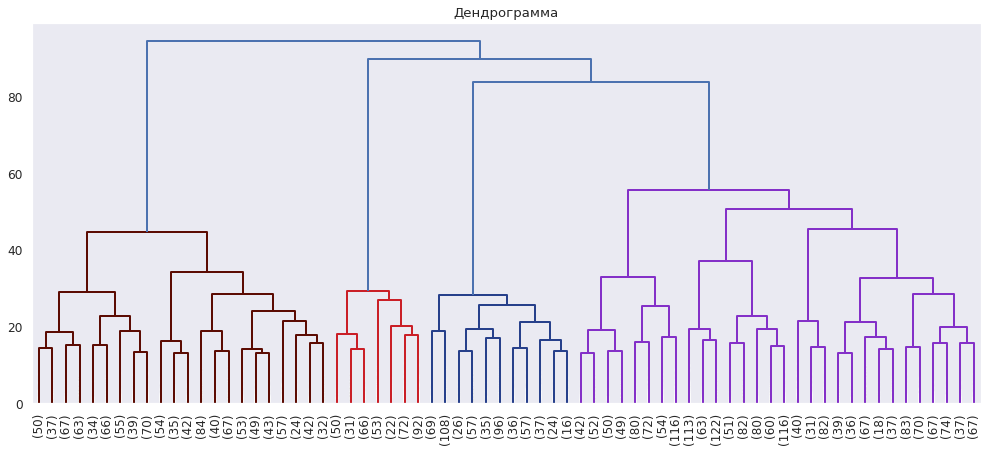

CPU times: user 25.3 s, sys: 607 ms, total: 25.9 s
Wall time: 26.1 s


In [20]:
%%time

# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
linked

hierarchy.set_link_color_palette(['#5c0c03', '#ca1f27', '#27408b', '#8430c8', '#555e31'])

sns.set_style("dark")

plt.figure(figsize=(17, 7))
with plt.rc_context({'lines.linewidth': 2.0}):
    dendrogram(linked,
               leaf_font_size=12,
               orientation='top',
               truncate_mode='lastp',
               p=70,
               show_contracted=True)
plt.title('Дендрограмма')
#plt.xticks([])
hierarchy.set_link_color_palette(None)
plt.show()

<font size=2,5> На графике разбивка на 4 кластера, однако последний, самый большой кластер можно разделить на 2, а то и три кластера.<br/>
<font color='blue'><b>В соответствии с условиями задания принимаем число кластеров `n=5`</b>

### Обучение модели кластеризации на основании алгоритма K-Means

In [21]:
 # задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state=0)

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(X_sc)
labels

array([4, 2, 3, ..., 0, 0, 4], dtype=int32)

### Cредние значения признаков для кластеров

In [22]:
# сохраняем метки кластера в исходный датасет
gym_churn['cluster'] = labels

# выводим статистику по средним значениям наших признаков с группировкой по кластерам
gym_churn.groupby('cluster').agg('mean')

gender  near_location  partner  promo_friends  phone  group_visits  \
cluster                                                                       
0         0.499          0.995    0.889          1.000  1.000         0.519   
1         0.501          0.000    0.488          0.077  1.000         0.232   
2         0.521          0.996    0.418          0.011  1.000         0.547   
3         0.512          1.000    0.197          0.054  1.000         0.297   
4         0.523          0.863    0.472          0.306  0.000         0.427   

         churn    age  contract_period  month_to_end_contract  lifetime  \
cluster                                                                   
0        0.133 29.543            6.844                  6.266     4.211   
1        0.402 28.686            2.978                  2.804     2.978   
2        0.017 30.805            6.726                  6.163     5.702   
3        0.506 27.819            2.013                  1.899     2.059   
4        0.267 29.298            4.777                  4.466     3.940   

         avg_additional_charges_total  avg_class_frequency_total  \
cluster                                                            
0                             152.139                      1.952   
1                             137.277                      1.763   
2                             177.104                      2.319   
3                             124.626                      1.539   
4                             144.208                      1.854   

         avg_class_frequency_current_month  
cluster                                     
0                                    1.899  
1                                    1.598  
2                                    2.314  
3                                    1.324  
4                                    1.724

<font size=2,5> Характерные особенности кластеров:<br/>
    
* <b>0 кластер:</b> самые высокие средние значения по партнёрской программе - 0,889 и по программе "приведи друга" - 1,0, хорошие средние показатели по общей выручке - 152,14 (второй результат) и "посещаемости" - 1,95. Это определённо кластер клиентов по партнёрской програме и акции.<br/>
    
* <b>1 кластер:</b> Выделяется нулевым значением `near_location`, все клиенты в этом кластере живут или работают далеко от фитнесс-центра.<br/>
    
* <b>2 кластер:</b> В нём практически нет клиентов по акции "приведи друга", он самый возрастной - средний возраст 30,8 лет, активней остальных ходит как на групповые занятия - ср.знач. 0,55, суммарно самый платёжоспособный, ср.значение выручки от доп.услуг - 177,1 и радует регулярностью занятий, самая высокая частота помещений за всё время - 2,32, ни у одного из других кластеров это показатель не превышает 2.<br/>
        
* <b>3 кластер:</b> Все клиенты живут/работют близко к фитнесс-центру, ср.знач. `near_location` - 1,0, самое малое число клиентов по партнёрской программе - 0,2, самая большая "текучка" также в этом кластере - `churn` 0,506, и самые низкие показатели срока окончания обонемента - 1,9, лайфтайма - 2,06, выручки - 124,63 и посещаемости 1,54 тренировки в неделю.<br/>
    
* <b>4 кластер:</b> Это скрытные клиенты, предпочитающие не оставлять свой номер телефона, нулевое значение этого параметра. При этом у этих клиентов не самый плохой лайфтайм, почти 4 месяца, как и показатель оттока - 0,27, также они не хуже всех приносят выручку с доп.услуг - 144,21, охотно посещают групповые занятия - 0,43, большая часть живёт или работает близко к залу - 0,863 и почти половина из них пришли по партнёрской программе 0,472. Эдакая "золотая середина", пускай и скрытная.  <br/>



### Распределения признаков для кластеров

In [23]:
# check
# список с бинарными признаками
print(binary)
# список с числовыми признаками
print(numerical)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [24]:
#gym_churn

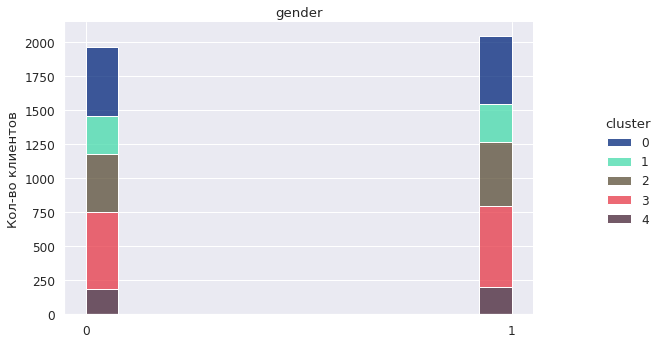

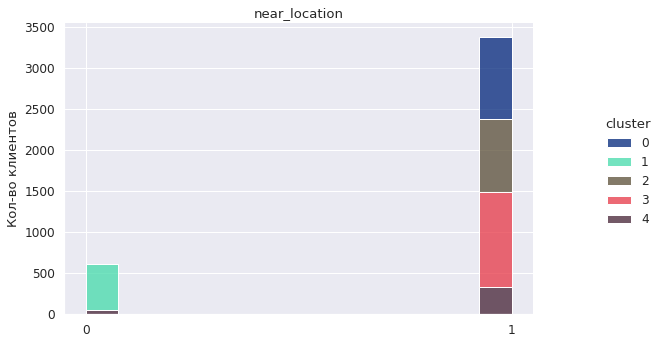

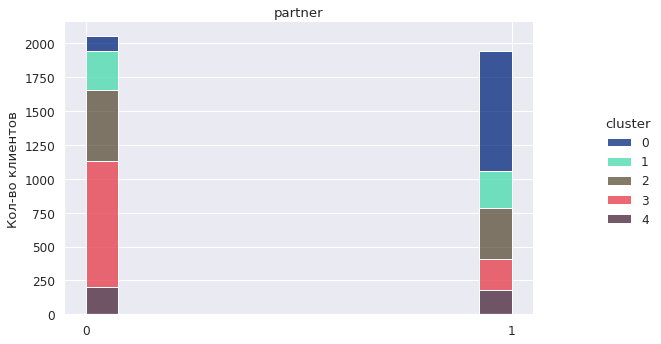

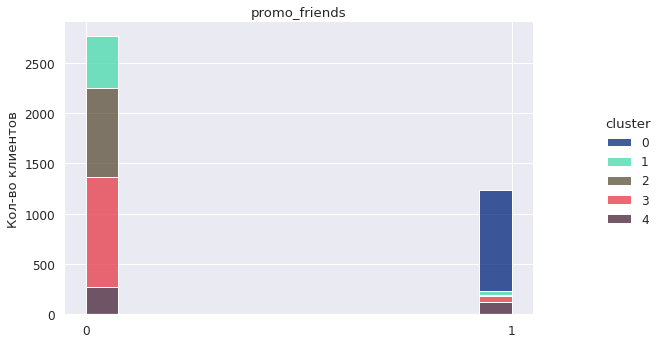

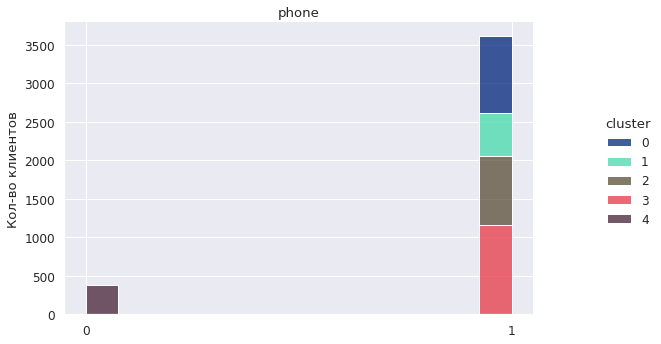

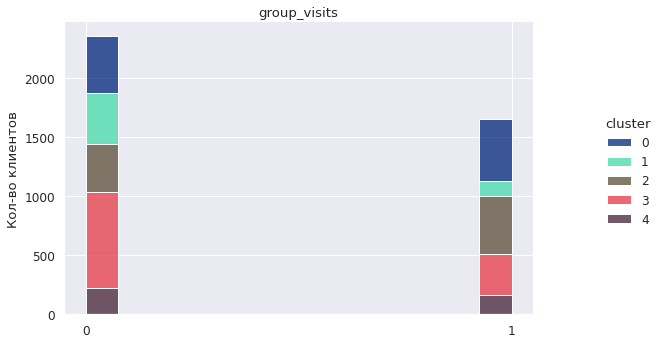

In [25]:
# графики для бинарных признаков
sns.set_style("darkgrid")
palette = ["#00257A", "#44DAAA", "#594D36", "#E63746", "#442234"]
for value in binary:
    g = sns.displot(gym_churn, x=gym_churn[value], hue='cluster',
                    palette=sns.color_palette(palette, len(palette)),
                    kind='hist', multiple='stack')
    plt.title(f'{value}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    plt.xticks([0, 1])
    g.fig.set_figwidth(10)
    g.fig.set_figheight(5);


<font size=2,5><u>Для кластеров по бинарным признакам можно сделать следующие выводы:</u>
* по гендерам каких-то ярких особенностей нет;
* по близости зала к дому/работе выделяется <b>кластер 1</b>, все клиенты которого далеко от фитнесс-центра;
* партнёрская программа и программа приведи друга - пользователи <b>кластера 0</b> здесь преобладают;
* <b>кластер 4</b> - те, кто не оставляет номер телефона;
* групповые тренировки меньшн всех любят пользователи <b>1 и 3 кластеров.</b><br/>
    
Построим графики для остальных признаков:

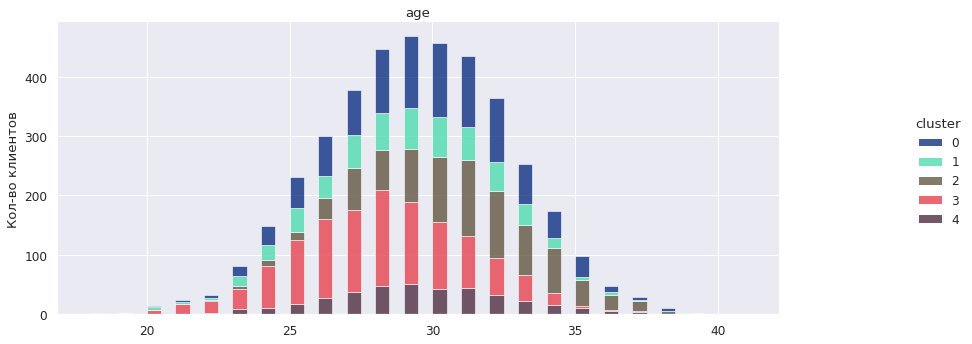

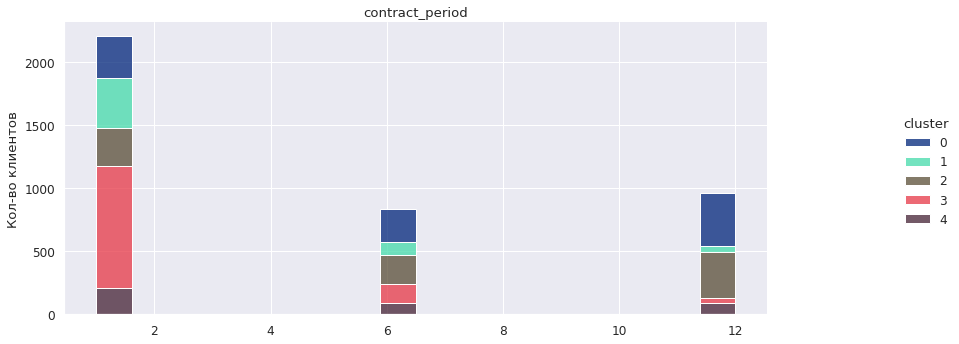

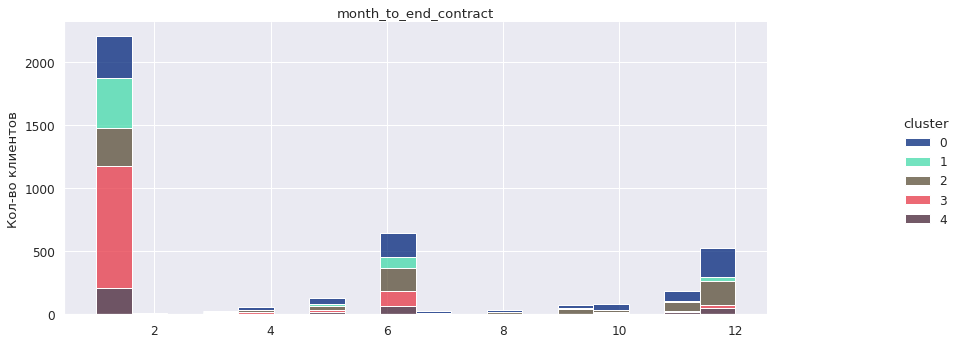

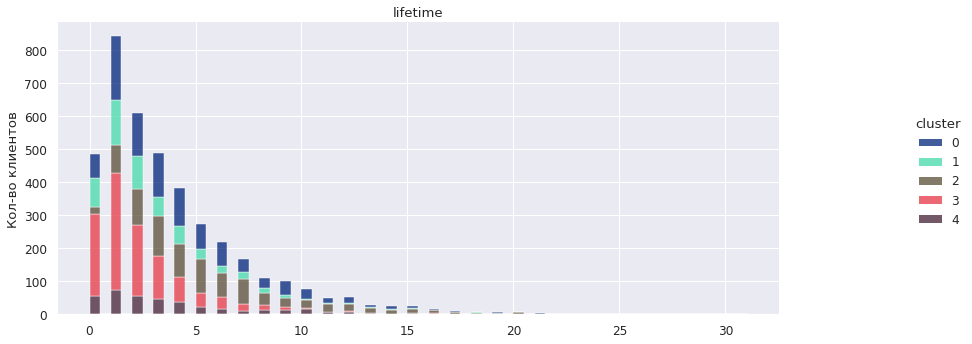

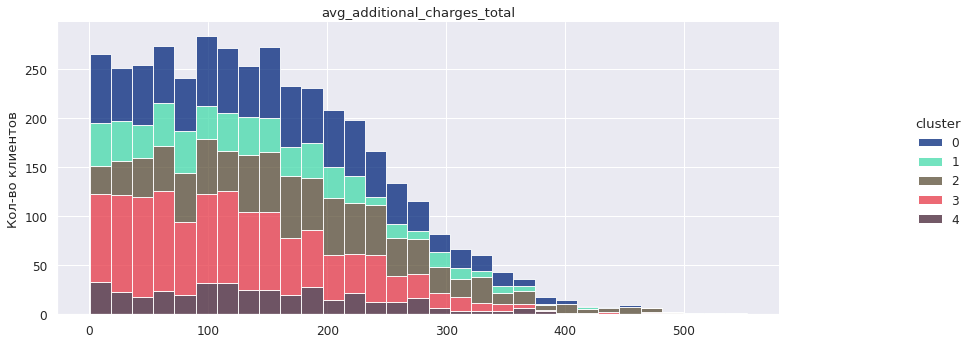

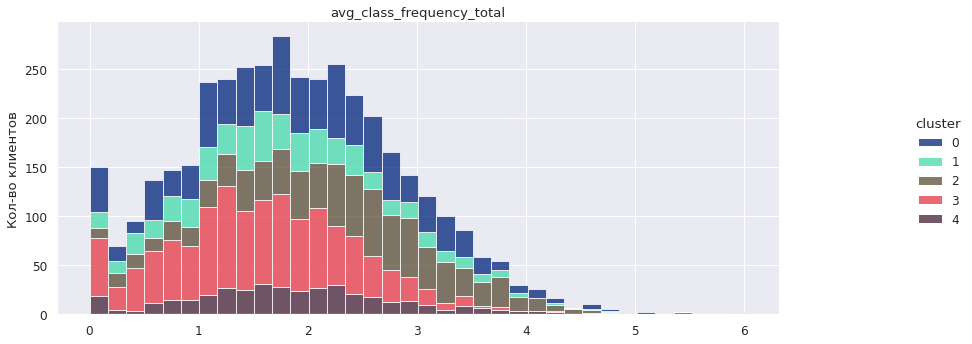

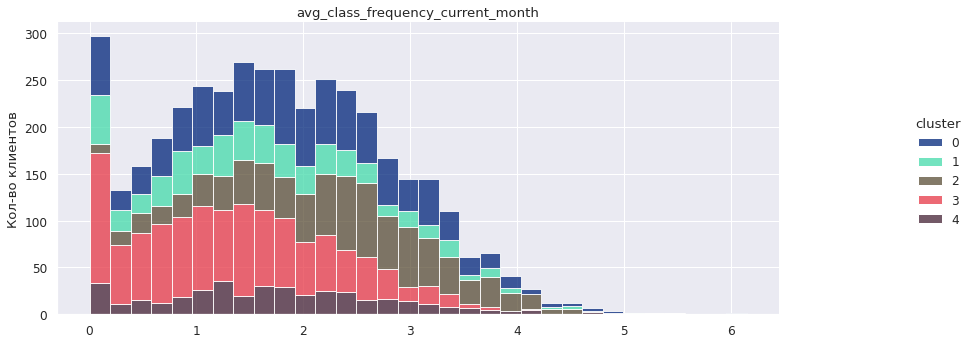

In [26]:
# графики для числовых признаков
sns.set_style("darkgrid")
palette = ["#00257A", "#44DAAA", "#594D36", "#E63746", "#442234"]
for value in numerical:
    g = sns.displot(gym_churn, x=gym_churn[value], hue='cluster',
                    palette=sns.color_palette(palette, len(palette)),
                    kind='hist', multiple='stack')
    plt.title(f'{value}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    #plt.xticks([0, 1])
    g.fig.set_figwidth(15)
    g.fig.set_figheight(5);


<font size=2,5><u>По числовым признакам можно сделать следующие выводы:</u>
* возраст во всех кластерах распределён равномерно, также можно отметить, что практически нет клиентов старше 40 лет;
* абонементы трёх видов, на 1, 6 и 12 месяцев, 3 кластер практичсеки целиком из клиентов с месячным абонементом;
* отсюда и вытекает корреляция в этом кластере и по оставшимся месяцам, в 3 кластере преобладает срок до окончания контракта в месяц;
* пик лайфтайма во всех кластерах на 1 месяце, за исключением 2 кластера, в этой группе он похоже стремится к 5 месяцам;
* 0 и 3 кластер тратят на допуслуги заметно больше остальных;
* средняя частота посещений в неделю как за всё время, так и за последний месяц лучше всего у 2 кластера, а в аутсайдерах 3 кластер, есть довольно большая часть клиентов, кто вообще не посещает зал неделями.

### Доля оттока для каждого кластера

In [27]:
outflow_share = gym_churn.groupby('cluster')['churn'].agg('sum') / gym_churn.groupby('cluster')['churn'].count()
outflow_share.reset_index()#(drop=True)

cluster  churn
0        0  0.133
1        1  0.402
2        2  0.017
3        3  0.506
4        4  0.267

<font size=2,5>Сильнее всего к оттоку склонны 3 и 1 кластеры, самые же стойкие и лояльные клиенты во 2 кластере.

## Выводы

<font size=2,5><i><b>В проекте был проведён анализ данных о клиентах сети фитнесс-центров.</b></i><br/>
    
* Перед проведением анализа выполнена небольшая предобработка данных, исправлен тип данных в столбе, столбцы сгруппированы по типу данных в них (бинарные или численные), для соблюдения стиля подкорректированы названия столбцов. В остальном же данные, предоставленные для анализа не потребовали сильной обработки, пропусков, дублей, некорректных значений не выявлено.<br/>
    
<hr style="border-color: darkblue;">
    
<i><b>Исследовательский анализ дал возможность представить общие черты поведения клиентов:</b></i><br/>
    
- Остающиеся клиенты это в первую очередь клиенты с длинным (полугодовым, годовым) абонементом, изначально скорее всего более замотивированные на занятия спортом, тогда как уходяшие клиенты в большинстве своём приобретаю только месячные абонементы, возможно в целях простого ознакомления с залом, когда хочется "пощупать" заведение, а одной ознакомительной тренировки недостаточно, либо это не сильно мотивированные клиенты, которым в случае чего и не жалко "потерять" абонемент.
- Мотивированные остающиеся клиенты также больше тратят денег на доп.услуги, охотнее занимаются в группе и вообще чаще посещают фитнесс-центр. Если для остающихся клиентов есть пускай и незначительное, но превышение ср.значения тренировок за последний месяц, по сравнению с общим ср.числом (2,025 < 2.028), клиент втягивается, ему нравится посещать занятия и он старается больше времени уделять физической активности. То для ушедших клиентов показатель за последний месяц уже заметно ниже общего ср.числа тренировок (1,475 > 1.045), с течением времени желание тренироваться в зале по разным причинам падает.<br/>
    
<hr style="border-color: darkblue;">

<i><b>Прогнозирование оттока клиентов:</b></i><br/>

- Для построения моделей прогнозирования оттока клиентов были использованы две модели: логистическая регрессия и случайный лес.
- Обе модели показали хорошие результаты, по всем параметрам Случайный лес немного лучше Логистической регрессии:
    * по параметру Accuracy - доля правильных ответов - 0,89 против 0,88;
    * Precision - точность - 0,80 против 0,77;
    * Recall - полнота - 0,78 против 0,75<br/>
    
<hr style="border-color: darkblue;">

<i><b>Кластеризация клиентов:</b></i><br/>

В соответствии с заданием была выполнена разбивка на 5 кластеров, однако при построении дендрограммы было получено 4 кластера.<br/> Характерные особенности получившихся кластеров:
* <b>0 кластер:</b> самые высокие средние значения по партнёрской программе - 0,889 и по программе "приведи друга" - 1,0, хорошие средние показатели по общей выручке - 152,14 (второй результат) и "посещаемости" - 1,95. Это определённо кластер клиентов по партнёрской програме и акции.<br/>
<b><font color='coral'>Доля оттока клиентов - 0,133</font></b><br/>

    
* <b>1 кластер:</b> Выделяется нулевым значением `near_location`, все клиенты в этом кластере живут или работают далеко от фитнесс-центра.<br/>
<b><font color='crimson'>Доля оттока клиентов - 0, 402</font></b> <br/>

    
* <b>2 кластер:</b> В нём практически нет клиентов по акции "приведи друга", он самый возрастной - средний возраст 30,8 лет, активней остальных ходит как на групповые занятия - ср.знач. 0,55, суммарно самый платёжоспособный, ср.значение выручки от доп.услуг - 177,1 и радует регулярностью занятий, самая высокая частота помещений за всё время - 2,32, ни у одного из других кластеров это показатель не превышает 2.<br/>
<b><font color='limegreen'>Доля оттока клиентов - 0,017</font></b><br/>

    
* <b>3 кластер:</b> Все клиенты живут/работют близко к фитнесс-центру, ср.знач. `near_location` - 1,0, самое малое число клиентов по партнёрской программе - 0,2, самая большая "текучка" также в этом кластере - `churn` 0,506, и самые низкие показатели срока окончания обонемента - 1,9, лайфтайма - 2,06, выручки - 124,63 и посещаемости 1,54 тренировки в неделю.<br/>
<b><font color='crimson'>Доля оттока клиентов - 0,506</font></b><br/>

    
* <b>4 кластер:</b> Это скрытные клиенты, предпочитающие не оставлять свой номер телефона, нулевое значение этого параметра. При этом у этих клиентов не самый плохой лайфтайм, почти 4 месяца, как и показатель оттока - 0,27, также они не хуже всех приносят выручку с доп.услуг - 144,21, охотно посещают групповые занятия - 0,43, большая часть живёт или работает близко к залу - 0,863 и почти половина из них пришли по партнёрской программе 0,472. Эдакая "золотая середина", пускай и скрытная.<br/>
<b><font color='coral'>Доля оттока клиентов - 0,267</font></b><br/>
    
<hr style="border-color: darkblue;">

## Рекомендации

<font size=2,5><b>На основании анализа кластеризации клиентов можно сделать рекомендовать следующее:</b>
    
1. Обратить внимание на клиентов с короткими, месячными абонементами, а также пришедших в фитнесс-центр самостоятельно, а не по акциям и партнёрским программам. Ненавязчивое внимание к новым клиентам может помочь этим клиентам стать постоянными. Предложение бесплатной групповой тренировки или занятие с тренером поможет создать и укрепить социальные связи и простимулирует желание заниматься дальше.<br/>
    
    
2. Нельзя при этом забывать и про клиентов с длинными абонементом и хорошим лайфтаймом. Лояльность тоже нужно поощрять и делать клиентам подарки, например бесплатная доп-услуга в день рождения покажет клиенту, что его здесь ценят.<br/>
    
    
3. В целом по возможности нужно стараться проявлять индивидуальный подход к каждому клиенту, обращать внимание не только на "проблемные" признаки. Предлагать клиентам советы, интересоваться успехами, всячески оказывать поддержку. Так все клиенты будут видеть, что нет никакого разделения на "любимых" и "не любимых".<br/>
    
    
4. Также не стоит забывать о поддержании в исправном состоянии интерьера клуба и работоспособности спортивного инвентаря и другого оборудования. Неисправный инвентарь может привести к травматизму, публичность окажет негативный эффект не тольо на пострадавшего, но и на остальных посетителей, кто будет находиться рядом в момент ЧП. Неисправная мебель в раздевалке или, что ещё хуже проблемы с душевыми (отсутствие горячей воды) точно не добавит клиентам желания вернуться ещё раз.